In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import decimal

df = pd.read_csv('./AutoSleepData.csv')
#df.drop(["fromDate", "toDate"], axis="columns", inplace=True)

df = df.dropna()

df["Time"] = pd.to_datetime(df['Time'])
df["bedtime"] = pd.to_datetime(df['bedtime'])
df["waketime"] = pd.to_datetime(df['waketime'])
df["asleep"] = pd.to_datetime(df['asleep'])
df["quality"] = pd.to_datetime(df['quality'])
df["deep"] = pd.to_datetime(df['deep'])

df["bedtime_hour"] = df["bedtime"].dt.hour
df.loc[df['bedtime'].dt.minute >= 30, 'bedtime_hour'] = df['bedtime_hour'] + 0.5

df["asleep_hour"] = df["asleep"].dt.hour + round(df['asleep'].dt.minute / 60, 1)
#df.loc[df['asleep'].dt.minute >= 30, 'asleep_hour'] = df['asleep_hour'] + 0.5

df["asleep_minutes"] = df['asleep'].dt.hour * 60 + round(df['asleep'].dt.minute, -1)
df["quality_minutes"] = df['quality'].dt.hour * 60 + round(df['quality'].dt.minute, -1)
df["deep_minutes"] = df['deep'].dt.hour * 60 + round(df['deep'].dt.minute, -1)
df["quality_ratio"] = df["quality_minutes"] / df["asleep_minutes"]
df["deep_ratio"] = df["deep_minutes"] / df["asleep_minutes"]

#df = df.loc[df['asleep_minutes']  < 720]
df = df.loc[(df['asleep_minutes']  > 380) & (df['asleep_minutes']  < 450)]
df = df.loc[df['quality_ratio']  < 1]
df = df.loc[df['quality_ratio']  < 1]
df = df.loc[(df['bedtime_hour']  > 20) | (df['bedtime_hour']  < 6)]
df.head()

,Time,bedtime,waketime,inBed,awake,asleep,asleepAvg7,efficiency,efficiencyAvg7,quality,...,wakingBPMAvg7,hrv,hrvAvg7,bedtime_hour,asleep_hour,asleep_minutes,quality_minutes,deep_minutes,quality_ratio,deep_ratio
9,2021-01-14 21:59:59+09:00,2021-01-14 03:00:00,2021-01-14 10:20:00,07:20:00,00:06:00,2022-06-23 07:14:00,08:09:08,98.6,92.2,2022-06-23 06:28:29,...,70.1,50.0,43.0,3.0,7.2,430,390,220,0.906977,0.511628
10,2021-01-15 21:59:59+09:00,2021-01-15 02:01:00,2021-01-15 09:10:00,07:09:00,00:00:00,2022-06-23 07:09:00,08:03:51,100.0,92.2,2022-06-23 06:04:03,...,69.7,81.0,50.0,2.0,7.2,430,360,180,0.837209,0.418605
11,2021-01-16 21:59:59+09:00,2021-01-16 02:54:00,2021-01-16 10:16:00,07:22:00,00:00:00,2022-06-23 07:22:00,08:32:34,100.0,92.2,2022-06-23 06:32:45,...,69.3,62.0,55.0,2.5,7.4,440,390,210,0.886364,0.477273
13,2021-01-18 21:59:59+09:00,2021-01-18 02:16:00,2021-01-18 09:52:00,07:36:00,00:11:00,2022-06-23 07:25:00,07:00:25,97.6,93.6,2022-06-23 06:11:55,...,67.6,45.0,68.0,2.0,7.4,440,370,170,0.840909,0.386364
17,2021-01-22 21:59:59+09:00,2021-01-22 01:39:00,2021-01-22 09:00:00,07:21:00,00:01:00,2022-06-23 07:20:00,06:55:51,99.8,99.6,2022-06-23 06:31:11,...,73.1,26.0,49.0,1.5,7.3,440,390,220,0.886364,0.500000


    bedtime_hour  quality_ratio  deep_ratio
10          -2.0       0.902439    0.560976
11          -1.5       0.867015    0.505226
0            0.0       0.871635    0.471371
1            0.5       0.869278    0.470857
2            1.0       0.848208    0.432977
3            1.5       0.857265    0.464228
4            2.0       0.841060    0.444786
5            2.5       0.824892    0.367249
6            3.0       0.859691    0.435881
7            3.5       0.891860    0.469186
8            4.0       0.895510    0.486641
9            5.0       0.906977    0.465116


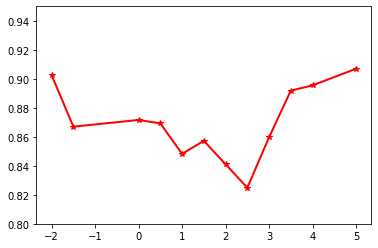

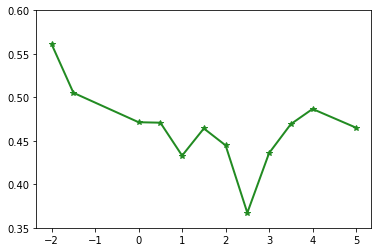

In [280]:
bedtime_data = df[["quality_ratio","deep_ratio",  "bedtime_hour"]]
bedtime_data = bedtime_data.groupby(['bedtime_hour'], as_index=False).mean()
bedtime_data.loc[bedtime_data['bedtime_hour'] > 21, 'bedtime_hour'] = df['bedtime_hour'] - 4
bedtime_data = bedtime_data.sort_values('bedtime_hour')
print(bedtime_data)

plt.plot(bedtime_data["bedtime_hour"], bedtime_data["quality_ratio"], color='red', marker='*', linewidth=2)
plt.ylim(0.8, 0.95)
plt.show()

plt.plot(bedtime_data["bedtime_hour"], bedtime_data["deep_ratio"], color='forestgreen', marker='*', linewidth=2)
plt.ylim(0.35, 0.6)
plt.show()

    asleep_hour  quality_ratio  deep_ratio
0           6.4       0.880342    0.508547
1           6.5       0.874644    0.415954
2           6.6       0.820962    0.419808
3           6.7       0.871875    0.456250
4           6.8       0.860610    0.442378
5           6.9       0.856272    0.455067
6           7.0       0.860806    0.470696
7           7.1       0.837864    0.449461
8           7.2       0.862667    0.445619
9           7.3       0.879870    0.496753
10          7.4       0.838636    0.431818


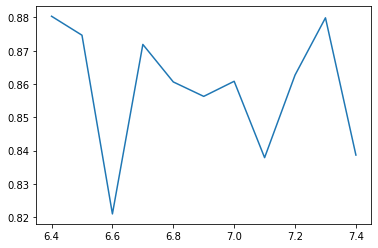

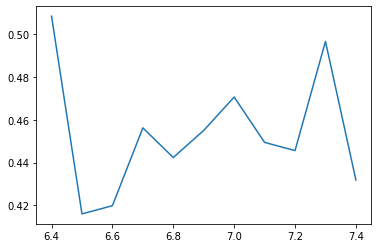

In [270]:
sleep_data = df[["quality_ratio","deep_ratio", "asleep_hour"]]
sleep_data = sleep_data.groupby(['asleep_hour'], as_index=False).mean()
print(sleep_data)
plt.plot(sleep_data["asleep_hour"], sleep_data["quality_ratio"])
plt.show()
plt.plot(sleep_data["asleep_hour"], sleep_data["deep_ratio"])
plt.show()